### Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


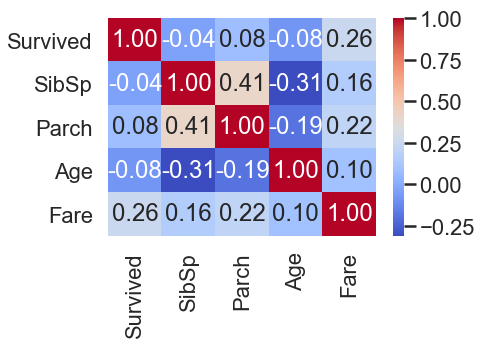

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams
g = sns.heatmap(titanic[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


In [7]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

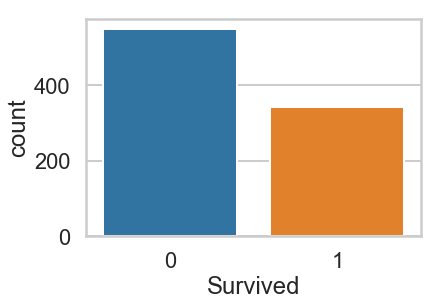

In [8]:
sns.countplot(titanic['Survived'],label="Count")

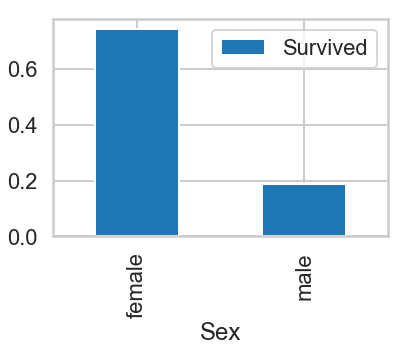

In [9]:
sex_pivot = titanic.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

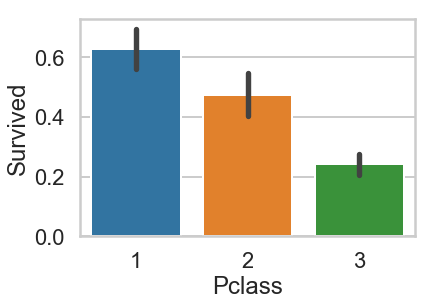

In [10]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

In [11]:
age = pd.cut(titanic['Age'], [0, 18, 80])
age1=titanic.pivot_table('Survived', ['Sex','Age', 'Name'], 'Pclass').fillna(0)
age1

Pclass                                                   1    2    3
Sex    Age   Name                                                   
female 0.75  Baclini, Miss. Eugenie                    0.0  0.0  1.0
             Baclini, Miss. Helene Barbara             0.0  0.0  1.0
       1.00  Johnson, Miss. Eleanor Ileen              0.0  0.0  1.0
             Nakid, Miss. Maria ("Mary")               0.0  0.0  1.0
       2.00  Allison, Miss. Helen Loraine              0.0  0.0  0.0
             Andersson, Miss. Ellis Anna Maria         0.0  0.0  0.0
             Hirvonen, Miss. Hildur E                  0.0  0.0  1.0
             Quick, Miss. Phyllis May                  0.0  1.0  0.0
             Skoog, Miss. Margit Elizabeth             0.0  0.0  0.0
             Strom, Miss. Telma Matilda                0.0  0.0  0.0
       3.00  Laroche, Miss. Simonne Marie Anne Andree  0.0  1.0  0.0
             Palsson, Miss. Stina Viola                0.0  0.0  0.0
       4.00  Becker, Miss. Marion Louise               0.0  1.0  0.0
             Karun, Miss. Manca                        0.0  0.0  1.0
             Kink-Heilmann, Miss. Luise Gretchen       0.0  0.0  1.0
             Sandstrom, Miss. Marguerite Rut           0.0  0.0  1.0
             Wells, Miss. Joan                         0.0  1.0  0.0
       5.00  Asplund, Miss. Lillian Gertrud            0.0  0.0  1.0
             Baclini, Miss. Marie Catherine            0.0  0.0  1.0
             Emanuel, Miss. Virginia Ethel             0.0  0.0  1.0
             West, Miss. Constance Mirium              0.0  1.0  0.0
       6.00  Andersson, Miss. Ebba Iris Alfrida        0.0  0.0  0.0
             Harper, Miss. Annie Jessie "Nina"         0.0  1.0  0.0
       7.00  Hart, Miss. Eva Miriam                    0.0  1.0  0.0
       8.00  Collyer, Miss. Marjorie "Lottie"          0.0  1.0  0.0
             Palsson, Miss. Torborg Danira             0.0  0.0  0.0
       9.00  Andersson, Miss. Ingeborg Constanzia      0.0  0.0  0.0
             Boulos, Miss. Nourelain                   0.0  0.0  0.0
             Ford, Miss. Robina Maggie "Ruby"          0.0  0.0  0.0
             Skoog, Miss. Mabel                        0.0  0.0  0.0
...                                                    ...  ...  ...
male   56.00 Simonius-Blumer, Col. Oberst Alfons       1.0  0.0  0.0
             Smart, Mr. John Montgomery                0.0  0.0  0.0
             Smith, Mr. James Clinch                   0.0  0.0  0.0
       57.00 Kirkland, Rev. Charles Leonard            0.0  0.0  0.0
       58.00 Kent, Mr. Edward Austin                   0.0  0.0  0.0
             Newell, Mr. Arthur Webster                0.0  0.0  0.0
       59.00 Coxon, Mr. Daniel                         0.0  0.0  0.0
             Sjostedt, Mr. Ernst Adolf                 0.0  0.0  0.0
       60.00 Brown, Mr. Thomas William Solomon         0.0  0.0  0.0
             Frolicher-Stehli, Mr. Maxmillian          1.0  0.0  0.0
             Weir, Col. John                           0.0  0.0  0.0
       61.00 Nysveen, Mr. Johan Hansen                 0.0  0.0  0.0
             Sutton, Mr. Frederick                     0.0  0.0  0.0
             Van der hoef, Mr. Wyckoff                 0.0  0.0  0.0
       62.00 Harris, Mr. George                        0.0  1.0  0.0
             Stead, Mr. William Thomas                 0.0  0.0  0.0
             Wright, Mr. George                        0.0  0.0  0.0
       64.00 Fortune, Mr. Mark                         0.0  0.0  0.0
             Nicholson, Mr. Arthur Ernest              0.0  0.0  0.0
       65.00 Duane, Mr. Frank                          0.0  0.0  0.0
             Millet, Mr. Francis Davis                 0.0  0.0  0.0
             Ostby, Mr. Engelhart Cornelius            0.0  0.0  0.0
       66.00 Wheadon, Mr. Edward H                     0.0  0.0  0.0
       70.00 Crosby, Capt. Edward Gifford              0.0  0.0  0.0
             Mitchell, Mr. Henry Michael               0.0  0.0  0.

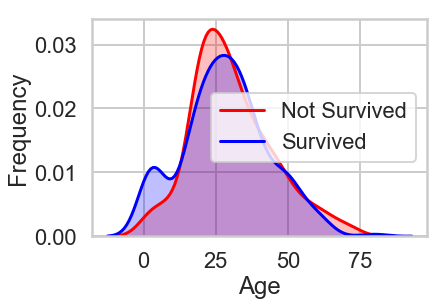

In [12]:
g = sns.kdeplot(titanic["Age"][(titanic["Survived"] == 0) & (titanic["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(titanic["Age"][(titanic["Survived"] == 1) & (titanic["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

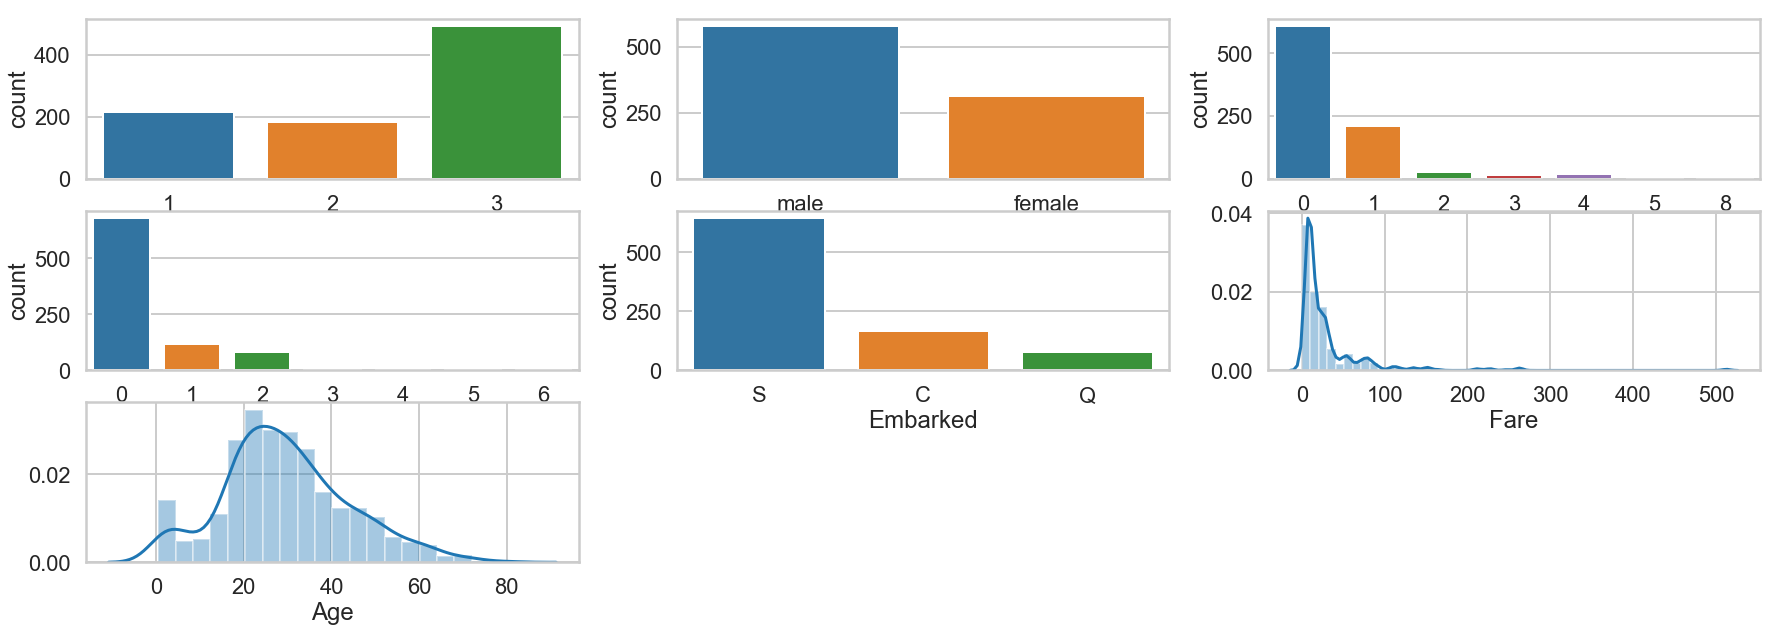

In [13]:
categ =  [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
conti = ['Fare', 'Age']

#Distribution
fig = plt.figure(figsize=(30, 10))
for i in range (0,len(categ)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(x=categ[i], data=titanic);  

for col in conti:
    fig.add_subplot(3,3,i + 2)
    sns.distplot(titanic[col].dropna());
    i += 1
    
plt.show()
fig.clear()

In [17]:
train_df = titanic.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
import numpy as np # linear algebra and arraus
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [35]:
candidate_train_predictors = titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
categorical_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].nunique() < 10 and
                                candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]
my_cols = categorical_cols + numeric_cols
train_predictors = candidate_train_predictors[my_cols]

dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [36]:
y_target = titanic["Survived"].values
x_features_one = dummy_encoded_train_predictors.values
print(x_features_one)

[[ 3. 22.  1. ...  0.  0.  1.]
 [ 1. 38.  1. ...  1.  0.  0.]
 [ 3. 26.  0. ...  0.  0.  1.]
 ...
 [ 3. 28.  1. ...  0.  0.  1.]
 [ 1. 26.  0. ...  1.  0.  0.]
 [ 3. 32.  0. ...  0.  1.  0.]]


In [37]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one,y_target,test_size=.25,random_state=1)

In [38]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one, y_target)

In [39]:
tree_one_accuracy = round(tree_one.score(x_features_one, y_target), 4)
print("Accuracy: %0.4f" % (tree_one_accuracy))

Accuracy: 0.9798


In [40]:
predictions = tree_one.predict(x_validation)

In [42]:
confusion_matrix(y_validation,predictions)

array([[128,   0],
       [  8,  87]], dtype=int64)

In [43]:
accuracy_score(y_validation, predictions)

0.9641255605381166

In [45]:
y_target = titanic["Survived"].values
x_features_two = dummy_encoded_train_predictors.values

In [46]:
tree_two = tree.DecisionTreeClassifier()
tree_two = tree_two.fit(x_features_two, y_target)


In [47]:
tree_two_accuracy = round(tree_two.score(x_features_two, y_target), 4)
print("Accuracy: %0.4f" % (tree_two_accuracy))

Accuracy: 0.9798


In [49]:
max_depth = 10
min_samples_split = 5
tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
tree_two = tree_two.fit(x_features_two, y_target)
tree_two_accuracy = round(tree_two.score(x_features_two, y_target), 4)
print("Accuracy: %0.4f" % (tree_two_accuracy))

Accuracy: 0.9091


In [51]:
titanic['family_size'] = 1 + titanic['SibSp'] + titanic['Parch']

candidate_train_predictors = titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin','SibSp','Parch'], axis=1)
categorical_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].nunique() < 10 and
                                candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]
my_cols = categorical_cols + numeric_cols
train_predictors = candidate_train_predictors[my_cols]

dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [53]:
y_target = titanic["Survived"].values
x_features_three = dummy_encoded_train_predictors.values

In [54]:
tree_three = tree.DecisionTreeClassifier()
tree_three = tree_three.fit(x_features_three, y_target)

In [56]:
tree_three_accuracy = round(tree_three.score(x_features_three, y_target), 4)
print("Accuracy: %0.4f" % (tree_three_accuracy))

Accuracy: 0.9798


In [57]:
max_depth = 10
min_samples_split = 5
tree_three = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
tree_three = tree_three.fit(x_features_three, y_target)

In [58]:
print(tree_three.score(x_features_three, y_target))

0.9090909090909091
